## Versión Astro-MG

Este es el modelo que viene por defecto, sin embargo también ha sido el modelo que mejores resultados me ha dado en la competición.

Con este modelo he conseguido un tiempo de 01:03.393.

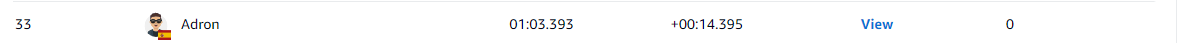

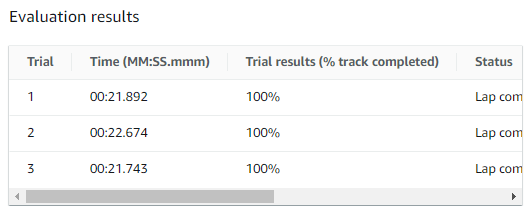

In [ ]:
def reward_function(params):
    # Leer los parámetros de entrada
    all_wheels_on_track = params['all_wheels_on_track']
    distance_from_center = params['distance_from_center']
    track_width = params['track_width']

    # Dar una recompensa muy baja por defecto
    reward = 1e-3

    # Dar una alta recompensa si ninguna rueda se sale de la pista y
    # el agente está en algún lugar entre los bordes de la pista
    if all_wheels_on_track and (0.5*track_width - distance_from_center) >= 0.05:
        reward = 1.0

    # Siempre devolver un valor flotante
    return float(reward)


## Versión Astro-MG50

Este es un modelo más complejo con el cual he conseguido reducir tiempos respecto al modelo por defecto.

Esto es porque el modelo por defecto es más imperfecto y se sale del circuito 1 por vueltas.

En este modelo penalizo la velocidad y la agresividad en las curvas lo que hace que el modelo sea más seguro y garantice que el coche no se salga del circuito.

Por tanto, al no salirse del circuito consigue ahorra 3 segundos por vuelta lo cual lo hace más rápido.

Sin embargo, por algún motivo que desconozco, al evaluar este modelo en la competición no obtengo los mismos resultados.

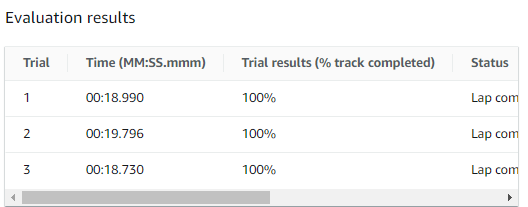

In [ ]:
def reward_function(params):
    # Parámetros de entrada
    all_wheels_on_track = params['all_wheels_on_track']
    speed = params['speed']
    steering_angle = params['steering_angle']
    track_width = params['track_width']
    distance_from_center = params['distance_from_center']

    # Configuraciones básicas
    reward = 1e-3

    # Velocidades mínima y máxima deseadas
    min_speed = 0.72
    max_speed = 1.25

    # Penalización por salir completamente de la pista
    if not all_wheels_on_track:
        return reward


    if speed < min_speed:
        reward *= 0.5  # Penalización por ir demasiado lento
    elif speed > max_speed:
        reward *= 0.5  # Penalización por exceder la velocidad máxima
    else:
        reward += speed  # Recompensa por mantener una velocidad óptima

    # Recompensa base por mantenerse en la pista
    reward = 1.0

    # Recompensa adicional por tomar curvas cerradas de manera agresiva
    if abs(steering_angle) > 27:
        # Calcular la proximidad al borde interno de la pista
        inner_track_limit = 0.1 * track_width
        if distance_from_center <= inner_track_limit:
            reward += 2.2 

    # Devuelve el valor de la recompensa
    return float(reward)
